In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.sparse import diags

In [2]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

[[  6.90335739]
 [ 18.4812328 ]
 [ 23.28979198]
 [ 17.49835925]
 [  1.96742981]
 [-16.69693491]
 [-28.34068466]
 [-24.63629149]
 [ -5.17040117]]


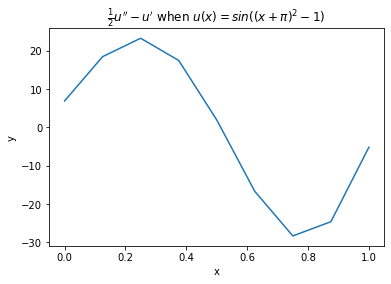

In [3]:
#setting the function
u = lambda x: np.sin((x+np.pi)**2 -1)
#setting variables
a = 0
b = 1
n = 10
h = (b-a)/n
x = np.linspace(a,b,n+1)

#getting u'
matL1 = diags([-1, 0, 1], [0,1,2],shape=(n-1, n+1)).toarray()
matR1 = np.reshape(np.array(u(x)), (n+1,1))
u_1 = matL1@matR1/(2*h)

#getting u''
matL2 = diags([1, -2, 1], [0,1,2],shape=(n-1, n+1)).toarray()
matR2 = np.reshape(np.array(u(x)), (n+1,1))
u_2 = matL2@matR2/(h**2)

#getting 1/2u''-u'
what_we_want = (u_2/2)-(u_1)
plt.plot(np.linspace(0,1,9),what_we_want)
print(what_we_want)
plt.title(r"$\frac{1}{2}u''-u' $ when $ u(x) = sin((x+\pi)^2 -1)$")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Problem 2

Equation (1.7) is the singularly perturbed boundary value problem
\begin{align*}
	&{ } \varepsilon u''(x)-u(x)'= f(x), \quad x \in (0,1), \\
	&{ } u(0) = \alpha, \quad u(1) = \beta.
\end{align*}

Use equation (1.9) to solve the singularly perturbed BVP (1.7) on $[0,1]$ with $\varepsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\varepsilon$. For $\varepsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

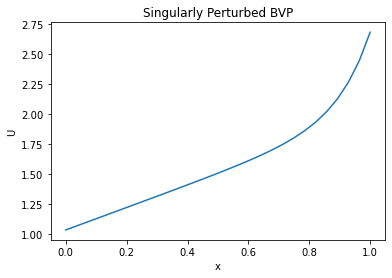

In [4]:
#getting the default variables
x = np.linspace(0,1,29)
epsiolon = 1/10
f = -1
a = 1
B = 3
n = 30
h = (1-0)/n

#getting the left matrix
left = diags([epsiolon + (h/2), -2*epsiolon, (epsiolon-(h/2))], [-1,0,1],shape=(n-1, n-1)).toarray()/(h**2)
#getting the right matrix
right = [f]*(n-1)
right[0] -= a*(epsiolon+h/2)/(h**2)
right[-1] -= B*(epsiolon-h/2)/(h**2)
right = np.reshape(right, (n-1,1))

#getting U 
U = np.linalg.solve(left, right)

#plotting
plt.plot(x, U)
plt.title("Singularly Perturbed BVP")
plt.xlabel('x')
plt.ylabel('U')
plt.show()


# Problem 3

Implement a function `singular_bvp` to compute the finite difference solution to (1.7).
Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.
Use these to visualize the $\mathcal{O}(h^2)$ convergence of the finite difference method from Problem 2 by producing a loglog plot of error against subinterval count; this will be similar to Figure 2, except with $\varepsilon=0.1$. 

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. ote that, since the ratios of numbers of subintervals between approximations are multiples of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation; the vector has length 5*2^9+1
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals; the vector has length 5*2^j+1
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error; slicing results in a vector of length 5*2^j+1,
    #    which allows it to be compared
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [5]:
def singular_bvp(eps,alpha,beta,f,n):
    """
    Solves the singularly perturbed BVP (1.7) on the interval [0,1] using finite differences.
    
    Parameters:
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    h = 1/n
    #getting the left matrix
    left = diags([eps + (h/2), -2*eps, (eps-(h/2))], [-1,0,1],shape=(n-1, n-1)).toarray()/(h**2)

    #getting the right matrix
    right = [f]*(n-1)
    right[0] -= alpha*(eps+h/2)/(h**2)
    right[-1] -= beta*(eps-h/2)/(h**2)
    right = np.reshape(right, (n-1,1))

    #getting U 
    U = np.linalg.solve(left, right).ravel()
    U = np.concatenate(([a], U, [B]))
    return U

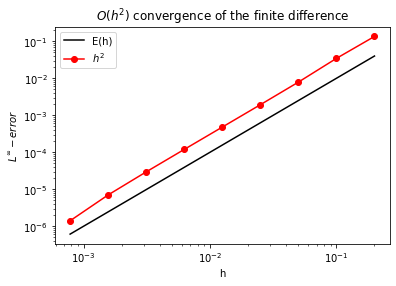

In [6]:
#getting the default variables
eps = .1
f = -1
alpha = 1
beta = 3
n = 5*(2**9)
x = np.linspace(0,1,n-1)
h = 1/(5*(2**np.arange(9)))

#getting the errors using a loop
error = []
sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))
for j in range(9):
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))
    error.append(np.max(np.abs(sol_approx - sol_best[::2**(9-j)])))

#plotting 
plt.loglog(h,h**2, label='E(h)', color = 'black')
plt.loglog(h,error, color = 'red', marker = 'o',label = r"$ h^2$")
plt.xlabel("h")
plt.ylabel(r"$ L^\infty -error$")
plt.legend()
plt.title(r"$ O(h^2)$ convergence of the finite difference")
plt.show()


    

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y''(x) +a_2(x)y'(x)+ a_3(x) y(x) = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) - 4(\pi - x^2)y(x) = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\varepsilon = 0.1$ on a grid with $n=30$ subintervals. Plot your solution.

In [7]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """
    Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
    using finite differences.
    
    Parameters:
        a, b (float): the left and right boundary points.
        alpha (float): the boundary value of y at x=a.
        beta (float): the boundary value of y at x=b.
        f (callable): the right-hand function of the BVP.
        a1, a2, a3 (callable): the coefficient functions of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    #setting h and x
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    #getting the left matrix
    left = diags([(a1(x[2:])-h*a2(x[2:])/2), 
                  (-2*a1(x[1:])+(h**2)*a3(x[1:])), 
                  (a1(x[1:])+a2(x[1:])*h/2)], 
                 [-1,0,1],shape=(n-1, n-1)).toarray()/(h**2)
    print(right)

    #getting the right matrix
    right = f(x[1:-1])
    right[0] -= alpha*(a1(x[0])-h*a2(x[0])/2)/(h**2)
    right[-1] -= beta*(a1(x[-1])+a2(x[-1])*h/2)/(h**2)
    right = np.reshape(right, (n-1,1))

    #getting U 
    U = np.linalg.solve(left, right).ravel()
    U = np.concatenate(([alpha], U, [beta]))
    
    return U

In [8]:
#getting the default variables
a = 0
b = np.pi/2
alpha = 0
beta = 1
n = 30
x = np.linspace(a,b,n+1)

#setting the functions
a1 = lambda x: .1
a2 = lambda x: 0
a3 = lambda x: -4*(np.pi-x**2)
f = lambda x: np.cos(x)

#getting U before we plot
U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
plt.plot(x, U, color = 'black')
plt.xlabel("x")
plt.ylabel("U")
plt.title(r"$\epsilon$ y''-4($\pi-x^2$)y$ =$cos(x)")


plt.show()

UnboundLocalError: local variable 'right' referenced before assignment

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) + xy'(x) = -\varepsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\varepsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals. Plot your solutions.

In [ ]:
#getting the default variables
a = -1
b = 1
alpha = -2
beta = 0
n = 150
x = np.linspace(a,b,n+1)

#setting the function wehn eps = .1
a1 = lambda x: .1
a2 = lambda x: x
a3 = lambda x: 0
f = lambda x: -.1*((np.pi)**2)*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)

#getting U before plotting
U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
plt.plot(x, U, color = 'red', label= r"$\epsilon = 0.1$")

#getting the default variables when eps = .01
a1 = lambda x: .01
a2 = lambda x: x
a3 = lambda x: 0
f = lambda x: -.01*((np.pi)**2)*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)

#getting U before plotting
U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
plt.plot(x, U, color = 'green', label= r"$\epsilon = 0.01$")

#getting the default variable when eps = .001
a1 = lambda x: .001
a2 = lambda x: x
a3 = lambda x: 0
f = lambda x: -.001*((np.pi)**2)*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)

#getting U before plotting
U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
plt.plot(x, U, color = 'blue', label= r"$\epsilon = 0.001$")

plt.title(r"$\epsilon$ y''(x) $ + $xy'(x)$ =-$$\epsilon$$\pi^2$cos($\pi$x)-$\pi$xsin($\pi$x)")
plt.xlabel("x")
plt.ylabel("U")
plt.legend()
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0, \\
	y(-1) = 1/(1+\varepsilon), \quad y(1) = 1/(1+\varepsilon),
\end{align*}

for $\epsilon = 0.05$ and $0.02$. Use a grid with $n=150$ subintervals. Plot your solutions.

In [ ]:
#getting the default variables when eps = .05
eps = .05
a = -1
b = 1
alpha = 1/(1+eps)
beta = 1/(1+eps)
n = 150
x = np.linspace(a,b,n+1)

#getting the functions
a1 = lambda x: (eps+x**2)
a2 = lambda x: 4*x
a3 = lambda x: 2
f = lambda x: 0*x

#getting U before plotting
U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
plt.plot(x, U, color = 'red', label= r"$\epsilon = 0.05$")

#getting the default variables when eps = .02
eps = .02
a = -1
b = 1
alpha = 1/(1+eps)
beta = 1/(1+eps)
x = np.linspace(a,b,n+1)
n = 150

#getting the functions
a1 = lambda x: (eps+x**2)
a2 = lambda x: 4*x
a3 = lambda x: 2
f = lambda x: 0*x

#getting U before plotting
U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
plt.plot(x, U, color = 'blue', label= r"$\epsilon = 0.02$")
plt.xlabel("x")
plt.ylabel("U")
plt.title(r"$(\epsilon+x^2$) y''(x) $ + $4xy'(x)$ + 2y(x)$ =0)")
plt.legend()
plt.show()